In [3]:
import os
print("Current Folder:", os.getcwd())
print("Files in this folder:", os.listdir())


Current Folder: /Users/bhumikapatil
Files in this folder: ['Untitled7.ipynb', '.config', 'Music', '.zprofile.pysave', '.condarc', 'Untitled5.ipynb', 'Untitled1.ipynb', '.DS_Store', '.CFUserTextEncoding', '.xonshrc', 'anaconda_projects', 'Untitled3.ipynb', 'Untitled.ipynb', '.zshrc', 'my-portfolio-backend', 'Untitled4.ipynb', '.psql_history', 'Untitled6.ipynb', 'Projects', 'Pictures', '.zprofile', '.zsh_history', 'Untitled2.ipynb', '.ipython', 'Desktop', 'Library', '.matplotlib', 'ML.ipynb', '.lesshst', '.oracle_jre_usage', 'scikit_learn_data', 'Exp2.ipynb', 'Public', 'portfolio-backend', '.idlerc', '.tcshrc', 'static', '.virtual_documents', 'Exp4.ipynb', '.anaconda', 'Movies', 'Exp6.ipynb', '.Trash', '.ipynb_checkpoints', '.jupyter', '.npm', 'Documents', '.vscode', '.bash_profile', 'EXP3.ipynb', 'Downloads', '.continuum', 'untitled.py', '.zsh_sessions', '.conda']


In [5]:
df = pd.read_csv("/Users/bhumikapatil/Downloads/heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()
df.describe()
df['target'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


target
1    165
0    138
Name: count, dtype: int64

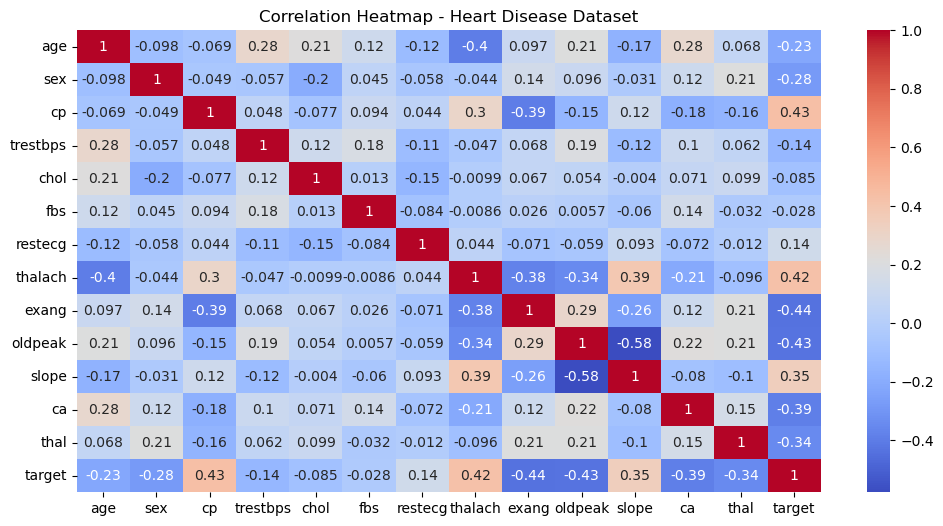

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Heart Disease Dataset")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

✅ Accuracy: 0.8688524590163934

📊 Confusion Matrix:
 [[25  4]
 [ 4 28]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



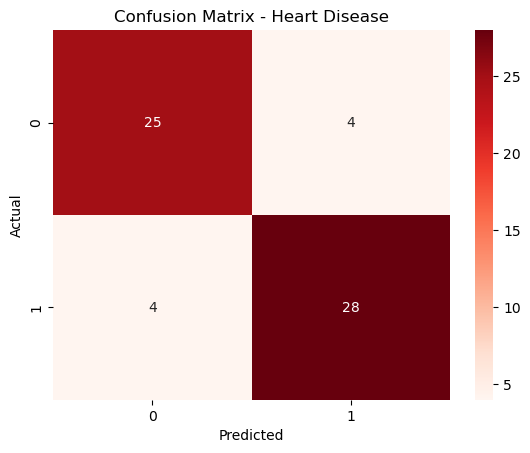

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds', fmt='d')
plt.title("Confusion Matrix - Heart Disease")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
